In [55]:
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

#from pandas_profiling import ProfileReport
#Importing the Dataset
#heart = pd.read_csv("heart.csv")
#dataset = heart


In [56]:
#Displaying data in a table format
col_names = ['age', 'sex', 'chest_pain_type', 'blood_pressure', 'cholesterol', 'blood_sugar', 'ECG_results', 'max_heart_rate', 'stress_test', 'old_peak', "slope_of_peak", "number_major_vessels", "thal", "target"]

heart_data = pd.read_csv("heart.csv", header=None, names=col_names)
heart_data = heart_data.iloc[1:]
heart_data.head()

,age,sex,chest_pain_type,blood_pressure,cholesterol,blood_sugar,ECG_results,max_heart_rate,stress_test,old_peak,slope_of_peak,number_major_vessels,thal,target
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
#Splitting the data into dependent and independent variables
dataset = heart_data
y = dataset.target
x = dataset.drop("target", axis = 1)
columns = x.columns
scaler = StandardScaler()
data_x = pd.DataFrame(scaler.fit_transform(x), columns = columns)

In [58]:
#Split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(data_x, y, test_size = 0.20, random_state = 45)

In [59]:
#Logistic regression classifier
logr = LogisticRegression()
logr.fit(x_train, y_train)
y_pred = logr.predict(x_test)
print('Accuracy of logistic regression classifier on test data: {:.5f}'.format(logr.score(x_test, y_test)))

Accuracy of logistic regression classifier on test data: 0.85246


Text(0.5, 7.5, 'Predicted label')

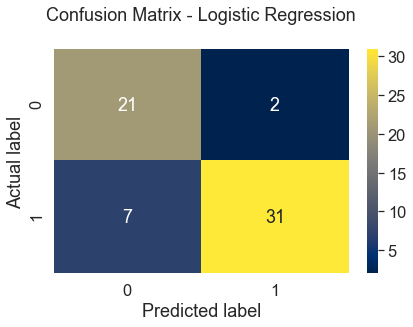

In [60]:
#Confusion matrix for logistic
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

#Ploting the Confusion Matrics
classes =[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
sns.set(font_scale=1.5)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="cividis" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
#RFE to reduce the predictors
rfe = RFE(logr, 8)
rfe = rfe.fit(data_x, y.values.ravel())
print(data_x)
print(rfe.support_)
print(rfe.ranking_)

          age       sex  chest_pain_type  blood_pressure  cholesterol  \
0    0.952197  0.681005         1.973123        0.763956    -0.256334   
1   -1.915313  0.681005         1.002577       -0.092738     0.072199   
2   -1.474158 -1.468418         0.032031       -0.092738    -0.816773   
3    0.180175  0.681005         0.032031       -0.663867    -0.198357   
4    0.290464 -1.468418        -0.938515       -0.663867     2.082050   
..        ...       ...              ...             ...          ...   
298  0.290464 -1.468418        -0.938515        0.478391    -0.101730   
299 -1.033002  0.681005         1.973123       -1.234996     0.342756   
300  1.503641  0.681005        -0.938515        0.706843    -1.029353   
301  0.290464  0.681005        -0.938515       -0.092738    -2.227533   
302  0.290464 -1.468418         0.032031       -0.092738    -0.198357   

     blood_sugar  ECG_results  max_heart_rate  stress_test  old_peak  \
0       2.394438    -1.005832        0.015443    -0

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [62]:
columns = ['sex', 'chest_pain_type', 'max_heart_rate', 'stress_test', 'old_peak', "slope_of_peak", "number_major_vessels", "thal",]
RfeX= data_x[columns]
RfeY = y



rfe_x_train, rfe_x_test, rfe_y_train, rfe_y_test = train_test_split(RfeX, RfeY, test_size=0.2, random_state=0)
logr.fit(rfe_x_train, rfe_y_train)
print('Accuracy of logistic regression classifier RFE on test set: {:.6f}'.format(logr.score(rfe_x_test, rfe_y_test)))

Accuracy of logistic regression classifier RFE on test set: 0.836066


Text(0.5, 7.5, 'Predicted label')

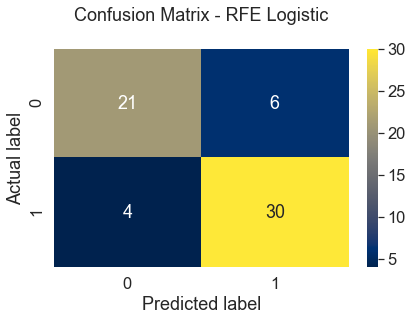

In [63]:
#Confusion matrix for logistic RFE
rfe_y_pred = logr.predict(rfe_x_test)
conf_matrix = metrics.confusion_matrix(rfe_y_test, rfe_y_pred)
conf_matrix

#Ploting the Confusion Matrics
rfe_classes =[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(rfe_classes))
plt.xticks(tick_marks, rfe_classes)
plt.yticks(tick_marks, rfe_classes)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="cividis" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - RFE Logistic', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
#RFE for 4 variables
rfe4 = RFE(logr, 3)
rfe4 = rfe4.fit(data_x, y.values.ravel())
print(rfe4.support_)
print(rfe4.ranking_)

cols4 = ['sex', 'chest_pain_type', 'old_peak',  "number_major_vessels"]
RfeX4= data_x[cols4]
RfeY4 = y

rfe4_x_train, rfe4_x_test, rfe4_y_train, rfe4_y_test = train_test_split(RfeX4, RfeY4, test_size=0.2, random_state=0)
logr.fit(rfe4_x_train, rfe4_y_train)
print('Accuracy of logistic regression classifier RFE (4 predictors) on test set: {:.5f}'.format(logr.score(rfe4_x_test, rfe4_y_test)))

[False False  True False False False False False False  True False  True
 False]
[10  2  1  7  9 11  8  3  5  1  6  1  4]
Accuracy of logistic regression classifier RFE (4 predictors) on test set: 0.83607


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 7.5, 'Predicted label')

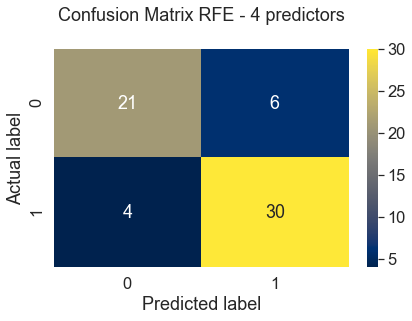

In [65]:
#Confusion Matrix for RFE with 4 predictors
rfe4_y_pred = logr.predict(rfe4_x_test)
conf_matrix_rfe4 = metrics.confusion_matrix(rfe4_y_test, rfe4_y_pred)
conf_matrix_rfe4

#Ploting the Confusion Matrics
rfe4_classes =[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(rfe4_classes))
plt.xticks(tick_marks, rfe4_classes)
plt.yticks(tick_marks, rfe4_classes)
sns.set(font_scale=1.5)

# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="cividis" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix RFE - 4 predictors', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [66]:
#SVM model
svm_classifier = SVC(kernel = "rbf", probability=True)

svm_classifier.fit(x_train, y_train)
y_pred_svm= svm_classifier.predict(x_test)
print('Accuracy of SVC (RBF) classifier on test set: {:.5f}'.format(svm_classifier.score(x_test, y_test)))


Accuracy of SVC (RBF) classifier on test set: 0.83607


Text(0.5, 7.5, 'Predicted label')

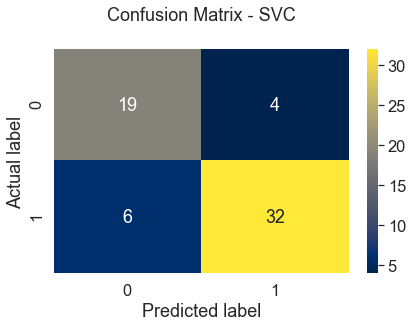

In [68]:
#Confusion matrix for SVM
conf_matrix_svm = metrics.confusion_matrix(y_test, y_pred_svm)

#Ploting the Confusion Matrics
classes_svm=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(classes_svm))
plt.xticks(tick_marks, classes_svm)
plt.yticks(tick_marks, classes_svm)
sns.set(font_scale=1.5)

# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix_svm), annot=True, cmap="cividis" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - SVC', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [69]:
#PCA for SVM
scaler = StandardScaler()
x_train_pca = scaler.fit_transform(x_train)
x_test_pca = scaler.transform(x_test)

from sklearn.decomposition import PCA

pca = PCA(n_components=5)
scaler = StandardScaler()

x_train_pca = pca.fit_transform(x_train_pca)
x_test_pca = pca.transform(x_test_pca)

x_train_pca = scaler.fit_transform(x_train_pca)
x_test_pca = scaler.transform(x_test_pca)

classifier_svm_kernel = SVC(kernel='rbf', probability=True)
classifier_svm_kernel.fit(x_train_pca,y_train)
y_pred_pca = classifier_svm_kernel.predict(x_test_pca)

#Confusion matrix for PCA for SVM
cm = metrics.confusion_matrix(y_test,y_pred_pca)



Text(0.5, 7.5, 'Predicted label')

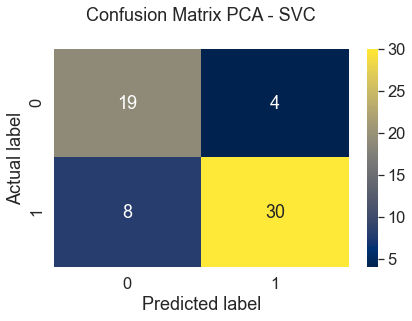

In [70]:
#Confusion Matrix for PCA
conf_matrix_pca = metrics.confusion_matrix(y_test, y_pred_pca)

#Plotting the Confusion Matrix
classes_rf=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(classes_rf))
plt.xticks(tick_marks, classes_rf)
plt.yticks(tick_marks, classes_rf)
sns.set(font_scale=1.5)

# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix_pca), annot=True, cmap="cividis" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix PCA - SVC', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

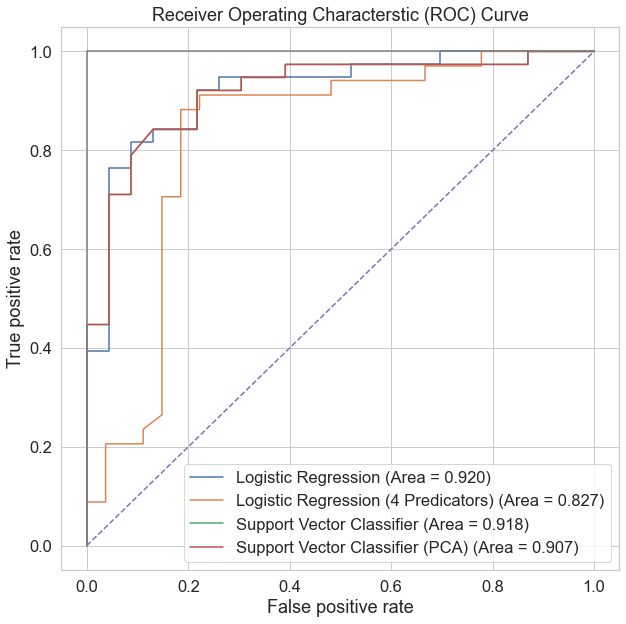

In [71]:
logreg = LogisticRegression()

logreg.fit(x_train, y_train)
logreg_y_pred_prob = logreg.predict_proba(x_test)
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve(y_test, logreg_y_pred_prob[:,1], pos_label='1')
lr_auc = metrics.roc_auc_score(y_test, logreg_y_pred_prob[:,1])

logreg.fit(rfe4_x_train, rfe4_y_train)
logreg4_y_pred_prob = logreg.predict_proba(rfe4_x_test)
lr4_fpr, lr4_tpr, lr4_thresholds = metrics.roc_curve(rfe4_y_test, logreg4_y_pred_prob[:,1], pos_label='1')
lr4_auc = metrics.roc_auc_score(rfe4_y_test, logreg4_y_pred_prob[:,1])

svm_y_pred_prob = svm_classifier.predict_proba(x_test)
svc_fpr, svc_tpr, svc_thresholds = metrics.roc_curve(y_test, svm_y_pred_prob[:,1], pos_label='1')
svc_auc = metrics.roc_auc_score(y_test, svm_y_pred_prob[:,1])

svm_y_pred_pca_prob = classifier_svm_kernel.predict_proba(x_test_pca)
svc_pca_fpr, svc_pca_tpr, svc_pca_thresholds = metrics.roc_curve(y_test, svm_y_pred_pca_prob[:,1], pos_label='1')
svc_pca_auc = metrics.roc_auc_score(y_test, svm_y_pred_pca_prob[:,1])


sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characterstic (ROC) Curve')
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (Area = {lr_auc:.3f})")
plt.plot(lr4_fpr,lr4_tpr, label=f"Logistic Regression (4 Predicators) (Area = {lr4_auc:.3f})")
plt.plot(svc_fpr,svc_tpr, label=f"Support Vector Classifier (Area = {svc_auc:.3f})")
plt.plot(svc_fpr,svc_tpr, label=f"Support Vector Classifier (PCA) (Area = {svc_pca_auc:.3f})")
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()


In [72]:
#We also created a Random Forest model below, but did not include it in the paper due to the page limit.
#We have included it in the code for future reference.
#Random Forest 
rf_model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = "sqrt")
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print('Accuracy of Random Forest on test data: {:.5f}'.format(rf_model.score(x_test, y_test)))

Accuracy of Random Forest on test data: 0.86885


Text(0.5, 7.5, 'Predicted label')

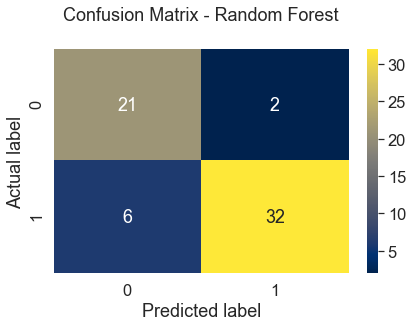

In [74]:
#Confusion Matrix for Random Forest
conf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)
conf_matrix_rf

#Plotting the Confusion Matrix
classes_rf=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(classes_rf))
plt.xticks(tick_marks, classes_rf)
plt.yticks(tick_marks, classes_rf)
sns.set(font_scale=1.5)

# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix_rf), annot=True, cmap="cividis" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [75]:
#K-fold cross validation for Random Forest

cv = cross_validate(rf_model, x, y, cv=5)
print(cv['test_score'])
print('mean cross validation: ')
print(cv['test_score'].mean())

[0.83606557 0.86885246 0.80327869 0.81666667 0.78333333]
mean cross validation: 
0.821639344262295
